Initial setup

In [1]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> 

Loading in previously sorted information on UASA software


In [3]:
relevant_software_pubs = pd.read_csv('{}/relevant_UASA_software_papers.csv'.format(DATA_DIR), index_col=0)

title_list = [t for t in relevant_software_pubs.title]
relevant_pubs = wosis.find_pubs_by_title(RC, title_list)

In [4]:
relevant_pubs.name = 'Relevant Software Publications'

In [5]:
sorted_software = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))
sorted_software.groupby('relevant')['title'].count()

relevant
?                                     31
No                                    39
No (not related to environment)       37
No - not relevant to environment       2
Yes                                   38
Yes - ARRAMIS                          1
Yes - BAT                              1
Yes - BMP Toolbox                      1
Yes - COMPARE                          1
Yes - Chaospy                          1
Yes - Crystal Ball (Excel)             1
Yes - DAKOTA                           1
Yes - DMMAP                            1
Yes - DUE                              1
Yes - DUET-H                           1
Yes - FReET                            1
Yes - GLUE                             1
Yes - GRIP                             1
Yes - GSAT                             1
Yes - GTApprox                         1
Yes - GUI-HDMR                         1
Yes - GUM                              1
Yes - HSPF                             1
Yes - IPH-TRIM3D                       1
Yes - M

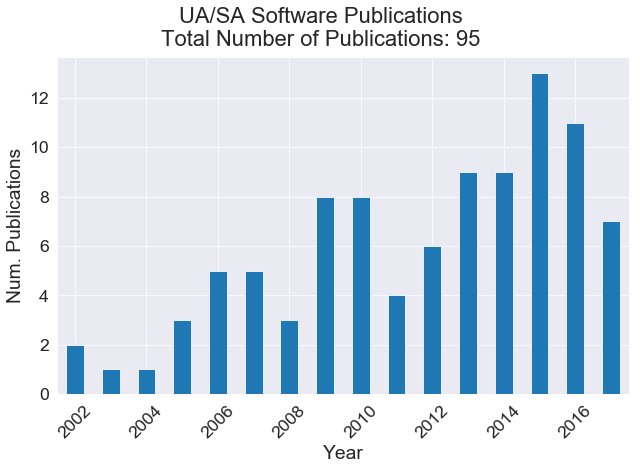

In [19]:
wos_plot.plot_pub_trend(relevant_pubs, title='UA/SA Software Publications')

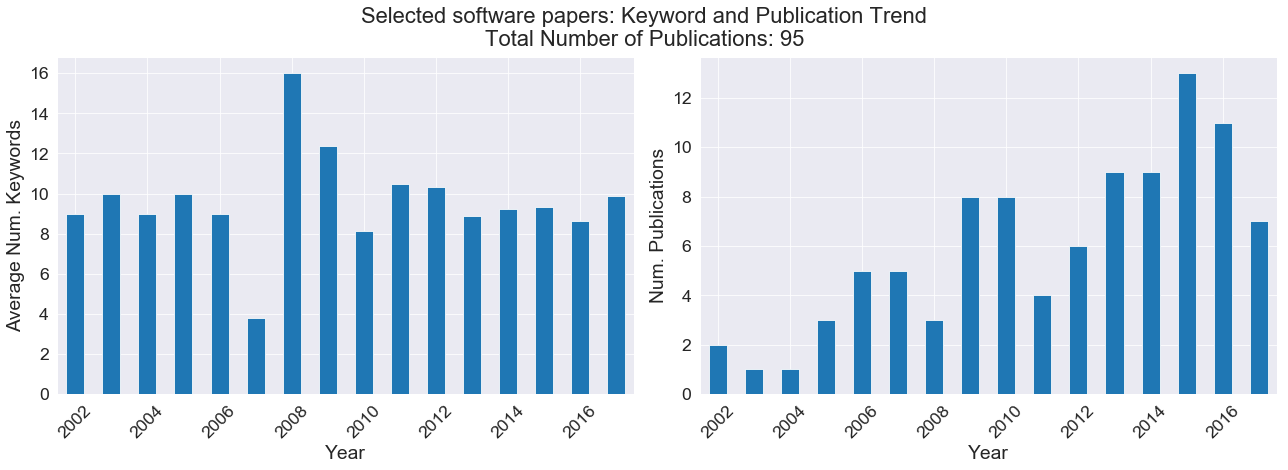

In [8]:
wos_plot.plot_kw_trend(relevant_pubs, title='Sorted software papers: Keyword and Publication Trend', 
                       save_plot_fn='{}/sorted_software_kw_trend.png'.format(FIG_DIR))

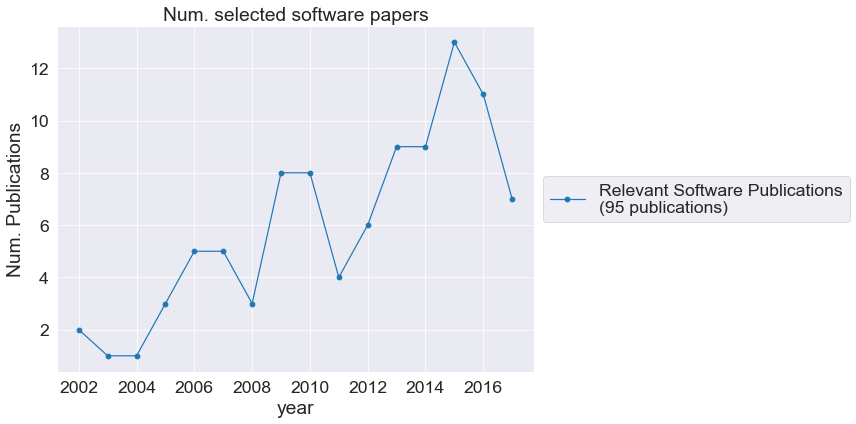

In [9]:
wos_plot.plot_topic_trend([relevant_pubs], total_rc=False, title='Num. sorted software papers', 
                          save_plot_fn='{}/sorted_software_topic_trend'.format(FIG_DIR))

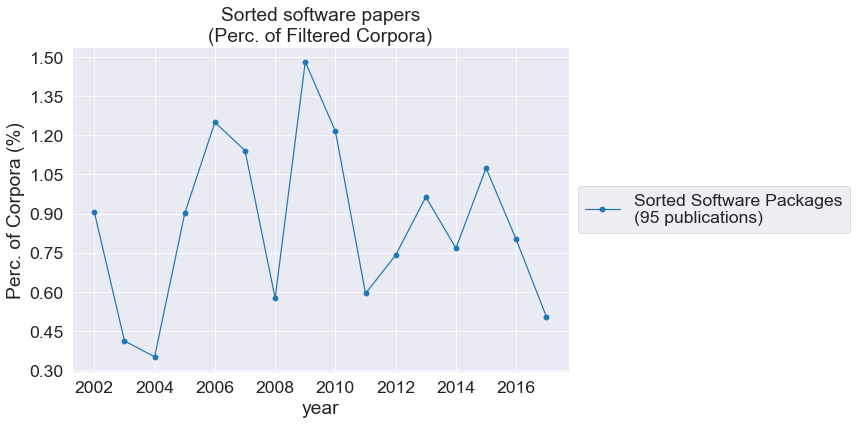

In [11]:
relevant_pubs.name = 'Sorted Software Packages'
wos_plot.plot_topic_trend([relevant_pubs], total_rc=RC, title='Sorted software papers\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/sorted_software_topic_trend_percentage'.format(FIG_DIR))

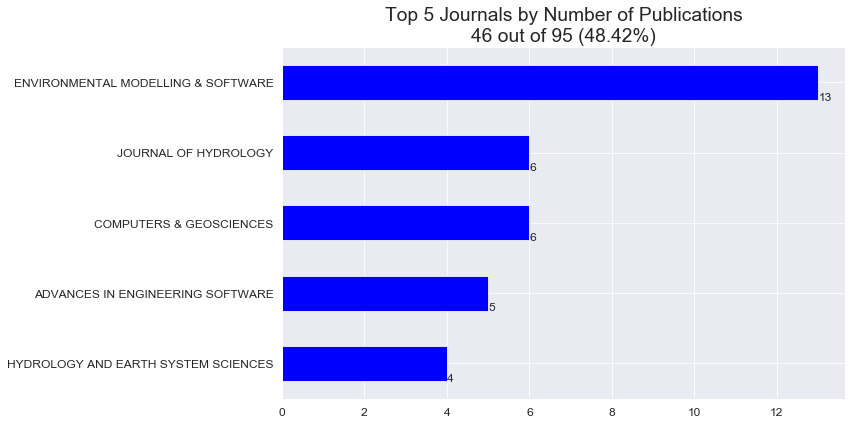

In [12]:
wos_plot.plot_pubs_per_journal(relevant_pubs, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/sorted_software_journal_pubs.png'.format(FIG_DIR))

In [13]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Hydrology and Earth System Sciences', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(relevant_pubs, journals_of_interest_software)

In [14]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-15'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

Authenticated (SID: 5Ag3Dsb3YGMotV3lHiM)



Authenticated (SID: 5FTw2R9Y1L1EmsC23Xf)



Authenticated (SID: 7FQNYYbzIcYM8emUoVH)



Authenticated (SID: 5FxxRjvswiNMmEje2Qc)



Authenticated (SID: 5Dn5lv6s7eaLxiLKsb1)


In [15]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [16]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
0,"Tang, Y|Reed, P|Wagener, T|van Werkhoven, K",2007,Comparing sensitivity analysis methods to adva...,HYDROLOGY AND EARTH SYSTEM SCIENCES,162,https://dx.doi.org/10.5194/hess-11-793-2007
4,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,121,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
26,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,ADVANCES IN ENGINEERING SOFTWARE,101,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
20,"Dixon, B",2005,Applicability of neuro-fuzzy techniques in pre...,JOURNAL OF HYDROLOGY,100,https://dx.doi.org/10.1016/j.jhydrol.2004.11.010
5,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,ENVIRONMENTAL MODELLING & SOFTWARE,99,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
6,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,ENVIRONMENTAL MODELLING & SOFTWARE,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
14,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,78,https://dx.doi.org/10.1016/j.cageo.2012.03.008
7,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,76,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
8,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,66,https://dx.doi.org/10.1016/j.envsoft.2008.12.006
21,"Shin, MJ|Guillaume, JHA|Croke, BFW|Jakeman, AJ",2013,Addressing ten questions about conceptual rain...,JOURNAL OF HYDROLOGY,61,https://dx.doi.org/10.1016/j.jhydrol.2013.08.047


In [17]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_sorted_software_papers.csv'.format(DATA_DIR))